### Quickstart for TARDIS ###

After the [installation](../installation.rst) start a jupyter server executing `jupyter notebook` on the commandline in a directory that contains the configuration file (in our example `tardis_example.yml`, which can be downloaded [here](https://raw.githubusercontent.com/tardis-sn/tardis/master/docs/models/examples/tardis_example.yml)). The atomic database (for more info refer to [atomic data](../atomic/atomic_data.rst) ) and a configuration file (more info at [configuration](../configuration/index.rst) ). You can obtain a copy of the atomic database from the
(https://github.com/tardis-sn/tardis-refdata) repository
(`atom_data` subfolder). We recommended to use the
`kurucz_cd23_chianti_H_He.h5` dataset (which is auto-downloaded in the second cell already).

In [1]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

import pygraphviz
import networkx as nx

/home/chinmay/anaconda3/envs/tardis/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/chinmay/Projects/GSOC/TARDIS/tardis/tardis/io/util.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


#### Downloading the atomic data ####

In [2]:
# the data is automatically downloaded
download_atom_data('kurucz_cd23_chianti_H_He')

[tardis.io.atom_data.atom_web_download][INFO   ]  Downloading atomic data from https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5 to /home/chinmay/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (atom_web_download.py:47)


#### Running the simulation (long output) ####

In [3]:
#TARDIS now uses the data in the data repo
!curl -O https://raw.githubusercontent.com/tardis-sn/tardis/master/docs/models/examples/tardis_example.yml
sim = run_tardis('tardis_example.yml')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   980  100   980    0     0   1074      0 --:--:-- --:--:-- --:--:--  1073
[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:74)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /home/chinmay/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:29)
[py.warnings         ][WARNING]  /home/chinmay/anaconda3/envs/tardis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:99)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:184)
[tardis.i

[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      11459.828312  10666.223660  0.506176  0.445097
	5      11688.139012  11000.288585  0.193468  0.163424
	10     11441.768967  10822.884326  0.122412  0.101641
	15     11099.449886  10384.181273  0.090915  0.078432

 (base.py:350)
[tardis.simulation.base][INFO   ]  t_inner 10123.177 K -- next t_inner 11180.783 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 10/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.28170e+43 erg / s Luminosity absorbed = 4.19511e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      10666.223660  11427.410445  0.445097  0.500788
	5      11000.288585  11612

[tardis.simulation.base][INFO   ]  Starting iteration 19/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 9.29848e+42 erg / s Luminosity absorbed = 3.02011e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      11316.665617  10862.505720  0.492135  0.444495
	5      11599.094127  11194.462074  0.183929  0.162842
	10     11403.508986  11065.620645  0.114400  0.099372
	15     10958.974248  10599.851144  0.087415  0.077690

 (base.py:350)
[tardis.simulation.base][INFO   ]  t_inner 10314.623 K -- next t_inner 11009.102 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 20/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.21062e+43 erg / s Luminosity absorbed = 3.88405e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[

**Making a LaTex file for plasma.graph**

In [4]:
sim.plasma.write_to_tex('graph.tex')

**Forming plasma graph, defining edge labels anad layout.**

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
plsma = sim.plasma
print_graph = plsma.graph.copy()
print_graph = plsma.remove_hidden_properties(print_graph)
for node in print_graph:
    print_graph._node[str(node)]['label'] = node
    if hasattr(plsma.plasma_properties_dict[node],
        'latex_formula'):
        formulae = plsma.plasma_properties_dict[node].latex_formula
        for output in range(0, len(formulae)):
            formula = formulae[output]
            label = formula.replace('\\', '\\\\')
            print_graph._node[str(node)]['label']+=label
formulae = {}
for u, v, d in print_graph.edges(data=True):
    if(d['label'][0] == '$'):
        formulae[(u,v)] = d['label'][1:-1]
    else :
        formulae[(u,v)] = d['label']
import pandas as pd
df = pd.DataFrame(index=print_graph.nodes(), columns=print_graph.nodes())
for row, data in nx.shortest_path_length(print_graph):
    for col, dist in data.items():
        df.loc[row,col] = dist
df = df.fillna(df.max().max())
layout = nx.kamada_kawai_layout(print_graph, dist=df.to_dict())

**Plotting Plasma Graph**

<IPython.core.display.Javascript object>


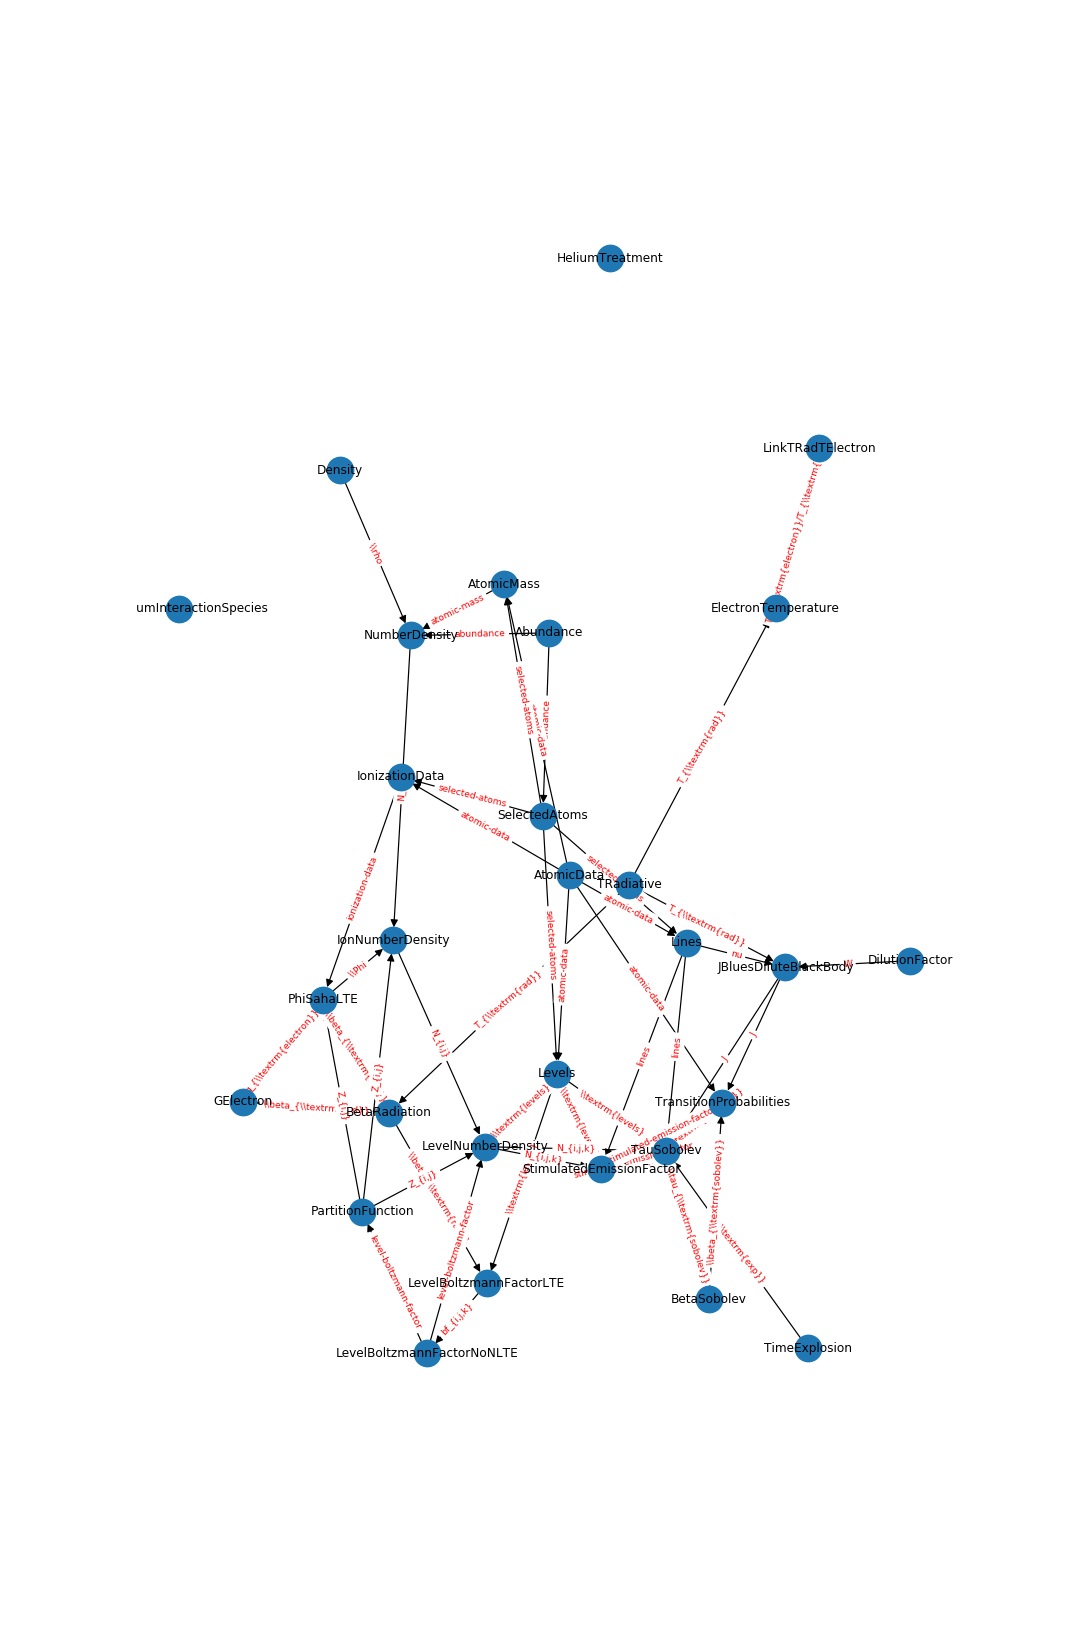

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(10,15)
edge_label_plot = nx.draw_networkx_edge_labels(print_graph,layout,edge_labels=formulae,font_size=6,font_color='red')
nx.draw_networkx_nodes(print_graph,layout,node_size=300)
nx.draw_networkx_edges(print_graph,layout,width=0.8,edge_color='black')
nx.draw_networkx_labels(print_graph,layout,font_size=8,font_family='sans-serif')
plt.axis('off')
plt.show()

###### Plotting the Spectrum ####

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


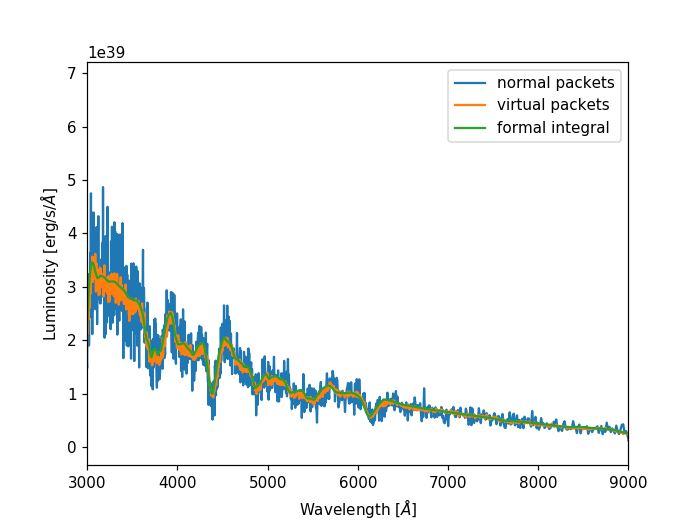

(3000, 9000)

In [10]:
%pylab notebook

spectrum = sim.runner.spectrum
spectrum_virtual = sim.runner.spectrum_virtual
spectrum_integrated = sim.runner.spectrum_integrated

plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label='normal packets')
plot(spectrum.wavelength, spectrum_virtual.luminosity_density_lambda, label='virtual packets')
plot(spectrum.wavelength, spectrum_integrated.luminosity_density_lambda, label='formal integral')
xlabel('Wavelength [$\AA$]')
ylabel('Luminosity [erg/s/$\AA$]')
legend()
xlim(3000, 9000)